<a href="https://colab.research.google.com/github/alpolo1991/analisis_de_datos_G77/blob/main/Regresi%C3%B3nLineal_DatasetVehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Aprendizaje Supervisado



Instalación de Librerias

In [379]:
pip install pandas numpy matplotlib seaborn scikit-learn

Importar bibliotecas

In [ ]:
# Importar bibliotecas
import pandas as pd # Cargar y manipular el dataset.
import numpy as np # Realizar cálculos numéricos.
import matplotlib.pyplot as plt # Para la visualización de datos.
import seaborn as sns # Para la visualización de datos.

Para el preprocesamiento, la división del dataset, entrenamiento del modelo y evaluación.

In [ ]:
## Para el preprocesamiento, la división del dataset, entrenamiento del modelo y evaluación.

# train_test_split: Importa la función para dividir datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split, KFold, cross_val_score
# MinMaxScaler: Importa la clase para escalar datos numéricos
from sklearn.preprocessing import MinMaxScaler
# Entrenar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Cargamos los datos

In [ ]:
# Cargamos los datos
folder = './Dataset_Vehicle/'
file_name = 'car data.csv'
path_data  = folder + file_name
car_data = pd.read_csv(path_data)

## Análisis Exploratorio de Datos (EDA)

Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

Este análisis nos ayudará a identificar relaciones entre variables, valores atípicos y tendencias en los datos.

Información o estructura general del dataset

In [ ]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


Nombre de columnas y cantidad de filas y columnas.

In [ ]:
print(car_data.shape)
print(len(car_data))
car_data.columns

(301, 9)
301


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Mostrar las primeras filas del dataset

In [ ]:
car_data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


Estadísticas descriptivas

In [ ]:
print("Estadística Descritiva: ")
car_data.describe()

Estadística Descritiva: 


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Verificar valores nulos

In [ ]:
print("Valores faltantes: ")
car_data.isnull().sum()

Valores faltantes: 


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


Eliminar filas de valores nulos

In [ ]:
print("Cantidad de filas antes de eliminar valores nulos: ", len(car_data))
car_data = car_data.dropna()
print("Cantidad de filas después de eliminar valores nulos: ", len(car_data))

Cantidad de filas antes de eliminar valores nulos:  301
Cantidad de filas después de eliminar valores nulos:  301


Revisamos datos dublicados

In [ ]:
print("Valores duplicados: ")
print(car_data.duplicated().sum())

Valores duplicados: 
2


Ver los valores duplicados

In [ ]:
car_data[car_data.duplicated]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


Eliminar datos duplicados

In [ ]:
print("Cantidad de filas antes de eliminar valores duplicados: ", len(car_data))
car_data = car_data.drop_duplicates()
print("Cantidad de filas después de eliminar valores duplicados: ", len(car_data))

Cantidad de filas antes de eliminar valores duplicados:  301
Cantidad de filas después de eliminar valores duplicados:  299


In [ ]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Estadisticas Descritivas

In [ ]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.567887,0.32,1.20,6.10,9.84,92.6
Kms_Driven,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


Distribución de variables numéricas.
Se crean los histogramas

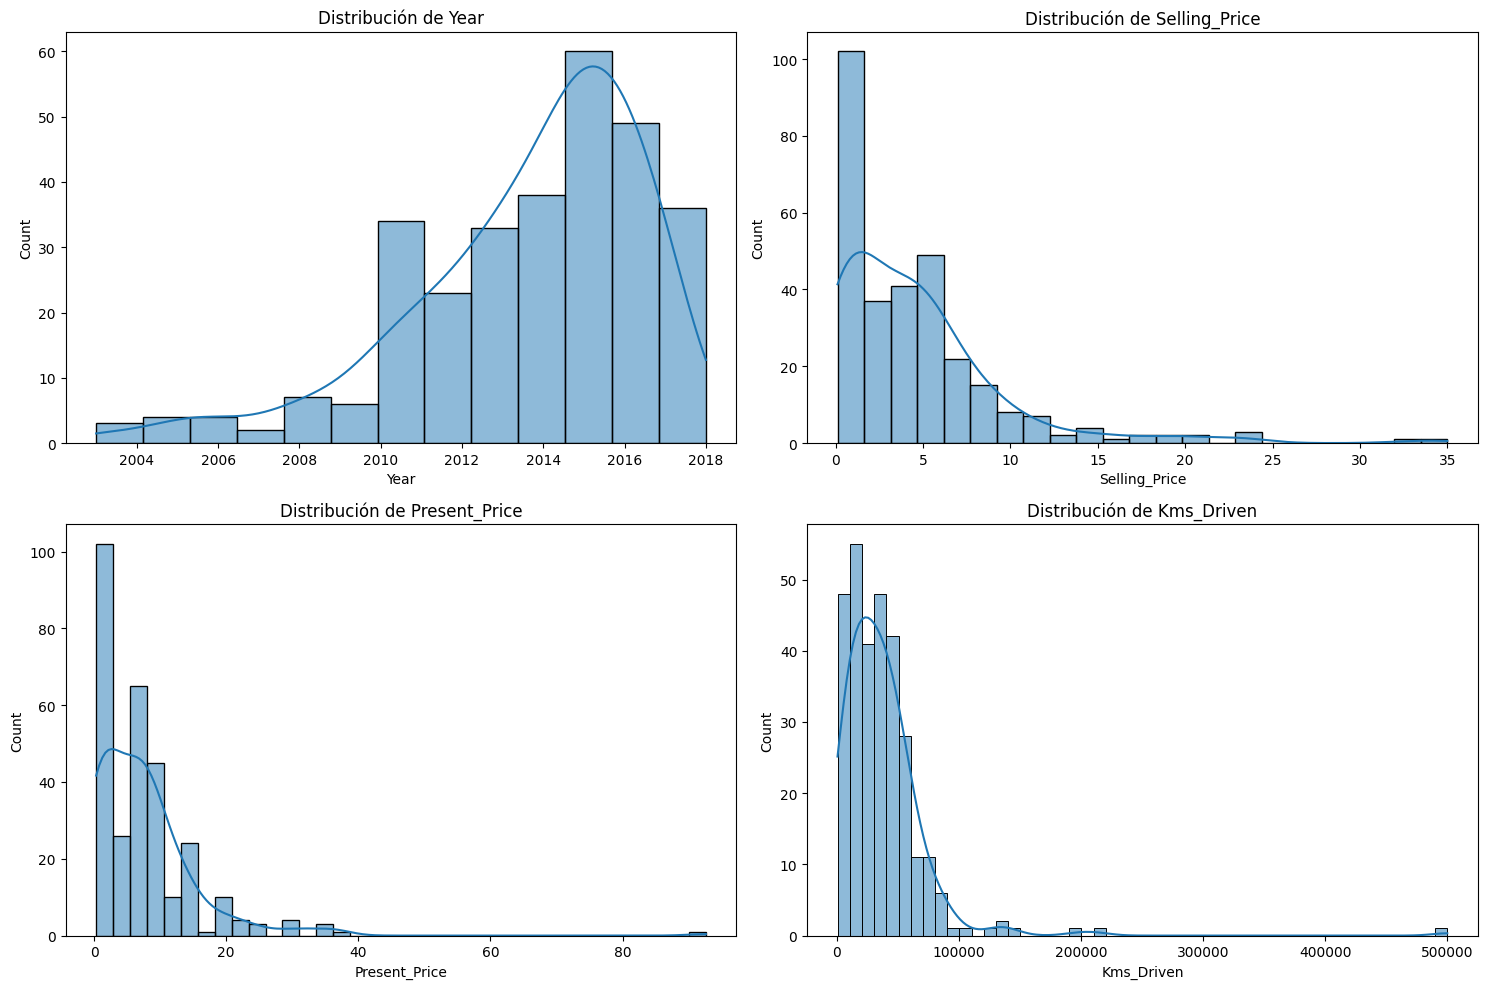

In [ ]:
column_year = 'Year'
column_selling_price = 'Selling_Price'
column_present_price = 'Present_Price'
column_kms_driven = 'Kms_Driven'

numeric_cols = [column_year, column_selling_price, column_present_price, column_kms_driven]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    sns.histplot(car_data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

Relación entre Selling_Price y Present_Price

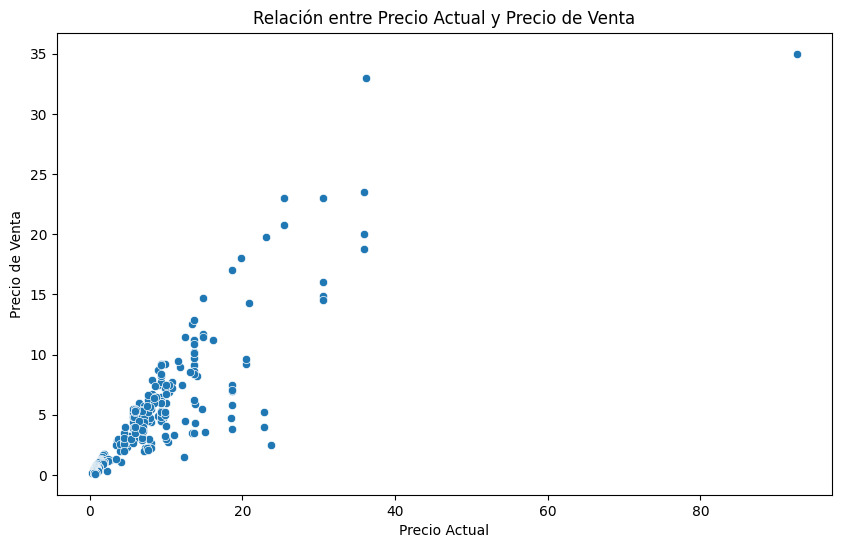

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Present_Price', y='Selling_Price', data=car_data)
plt.xlabel('Precio Actual')
plt.ylabel('Precio de Venta')
plt.title('Relación entre Precio Actual y Precio de Venta')
plt.show()

Relación entre Año y Precio de Venta

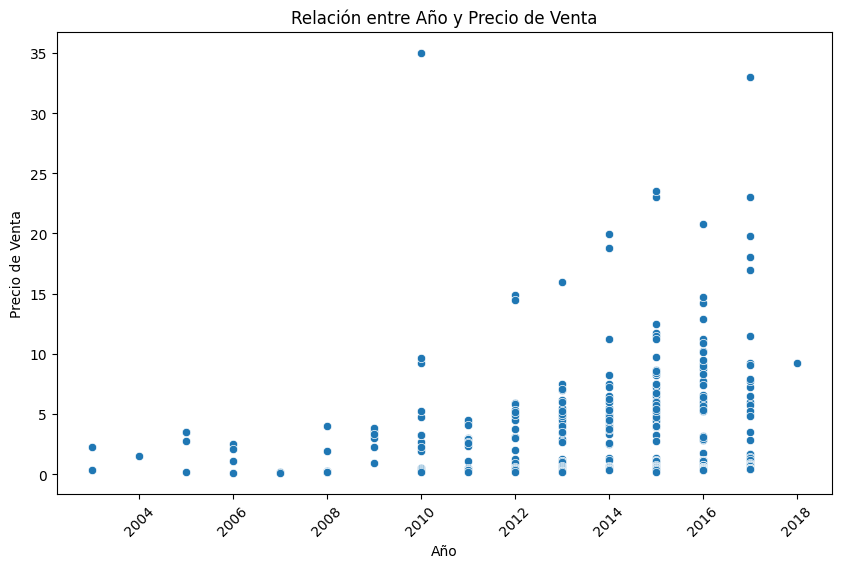

In [ ]:
plt.figure(figsize=(10, 6))
x = 'Year'
y = 'Selling_Price'
sns.scatterplot(x=x, y=y, data=car_data)
plt.xlabel('Año')
plt.ylabel('Precio de Venta')
plt.title('Relación entre Año y Precio de Venta')
plt.xticks(rotation=45)
plt.show()

Precio de venta por tipo de combustible


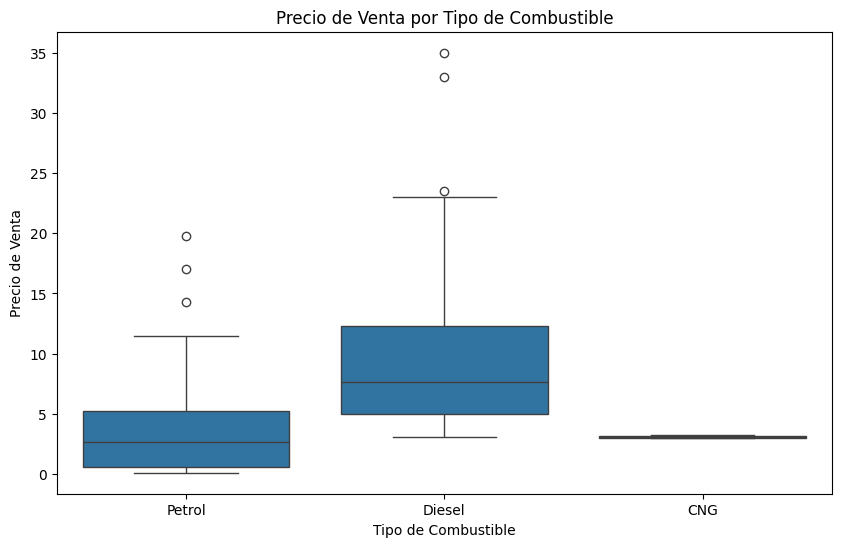

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data)
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio de Venta')
plt.title('Precio de Venta por Tipo de Combustible')
plt.show()

Mapa de calor para visualizar correlaciones

Correlación entre variables numéricas

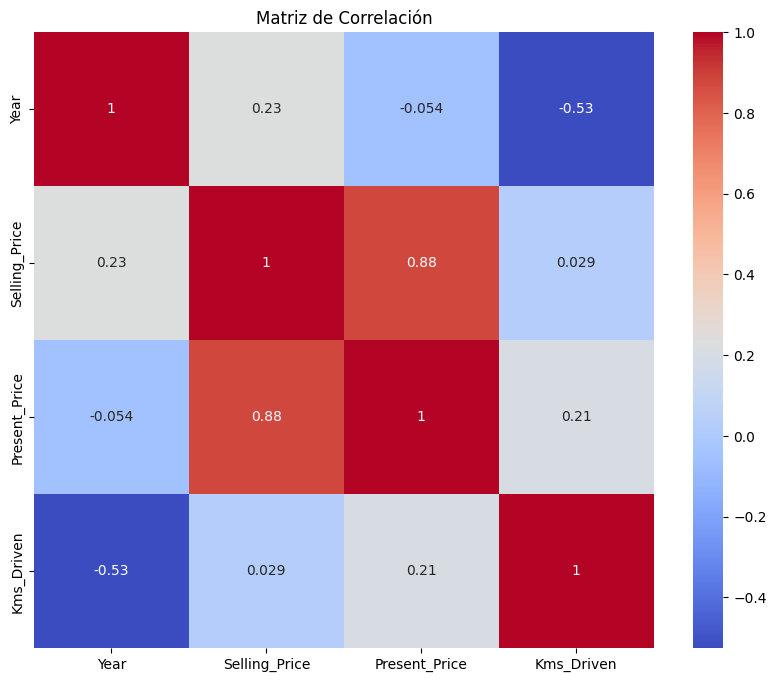

In [ ]:
correlation_matrix = car_data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Conteo de autos por tipo de vendedor y transmisión

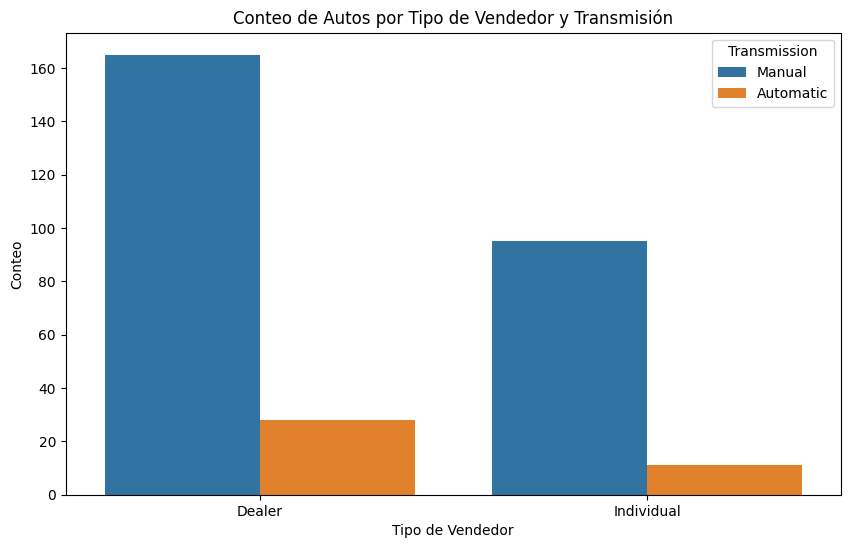

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Seller_Type', hue='Transmission', data=car_data)
plt.xlabel('Tipo de Vendedor')
plt.ylabel('Conteo')
plt.title('Conteo de Autos por Tipo de Vendedor y Transmisión')
plt.show()

Relación entre kilómetros recorridos y precio de venta

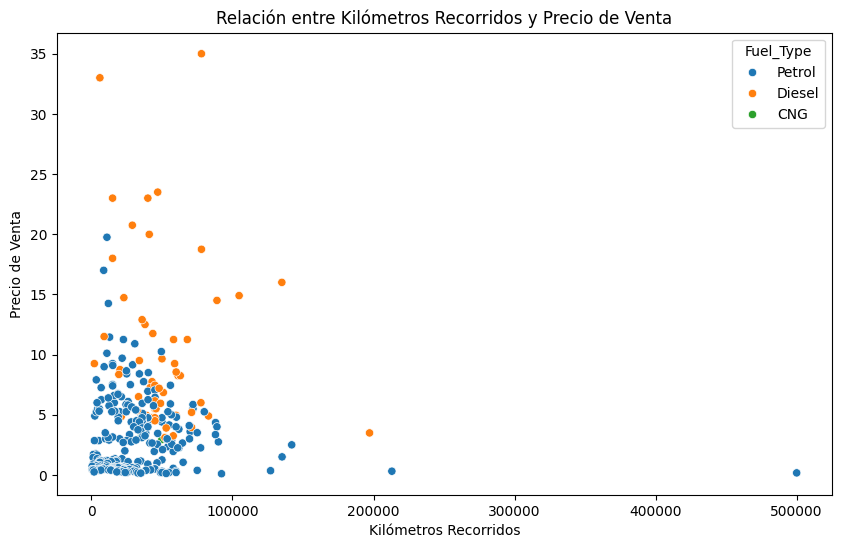

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', hue='Fuel_Type', data=car_data)
plt.xlabel('Kilómetros Recorridos')
plt.ylabel('Precio de Venta')
plt.title('Relación entre Kilómetros Recorridos y Precio de Venta')
plt.show()

Histograma del precio de venta

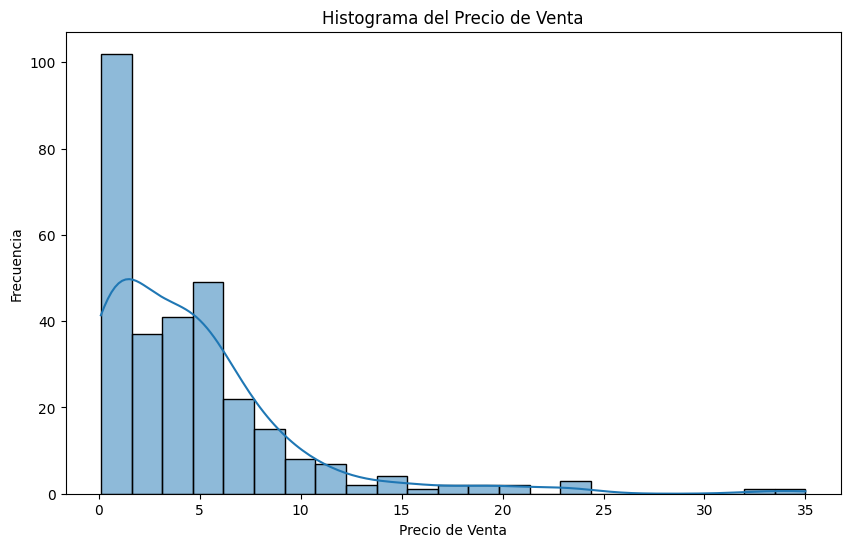

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Selling_Price'], kde=True)
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.title('Histograma del Precio de Venta')
plt.show()

Histograma del precio actual

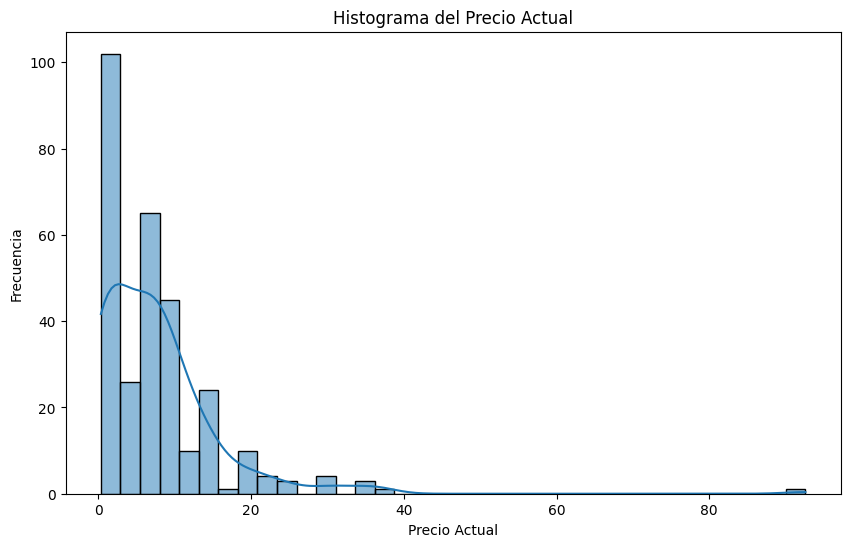

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Present_Price'], kde=True)
plt.xlabel('Precio Actual')
plt.ylabel('Frecuencia')
plt.title('Histograma del Precio Actual')
plt.show()

Histograma del por año

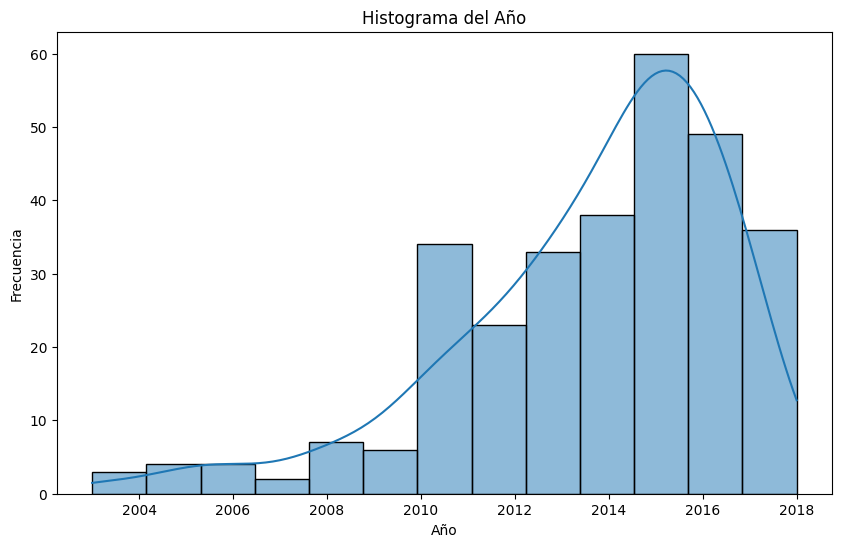

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Year'], kde=True)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Histograma del Año')
plt.show()

## Preprocesamiento de los datos

En este paso, se deben limpiar los datos, transformar variables categóricas en variables numéricas (dummy variables), y asegurarse de que no haya valores faltantes.

Eliminamos la columna Car_Name ya que no aporta valor predictivo


In [ ]:
car_processed = car_data.drop('Car_Name', axis=1)

In [ ]:
car_processed.head(6)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0


In [ ]:
car_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           299 non-null    int64  
 1   Selling_Price  299 non-null    float64
 2   Present_Price  299 non-null    float64
 3   Kms_Driven     299 non-null    int64  
 4   Fuel_Type      299 non-null    object 
 5   Seller_Type    299 non-null    object 
 6   Transmission   299 non-null    object 
 7   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 21.0+ KB


In [ ]:
car_processed.shape

(299, 8)

Creamos nueva columna años - Age

In [ ]:
from datetime import datetime

# Calculamos años de los vehiculos con la fecha actual cuanto a pasado.
current_year = datetime.now().year
print("El año actual es {}".format(current_year))
print(f"El mes actual es {datetime.now().month}")
print(f"El día actual es {datetime.now().day}")
print(f"La hora actual es {datetime.now().hour}:{datetime.now().minute}:{datetime.now().second}")

car_processed['Age'] = current_year - car_processed['Year']

# o Podemos cacular tambien los años desde el mayor.
# car_processed['Age'] = car_processed['Year'].max() - car_processed['Year']
# car_processed['Age'] = ((car_processed['Year'].max() + 1) - car_processed['Year'])

# print("El año actual es {}".format(datetime.now().year))
# print("El mes actual es {}".format(datetime.now().month))
# print("El día actual es {}".format(datetime.now().day))

car_processed.head(10)


El año actual es 2024
El mes actual es 10
El día actual es 10
La hora actual es 13:45:33


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
5,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,6
6,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,9
7,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,9
8,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,8
9,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,9


Números de valores únicos para cada columna

In [ ]:
print("El números de valores únicos para cada columna es: ")
print(car_processed.apply(lambda x: len(x.unique())), "\n")

El números de valores únicos para cada columna es: 
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
Age               16
dtype: int64 



Validamos los tipos de columna por categoria o numericas y las mostramos.

In [ ]:
car_categorical = car_processed.select_dtypes(include=['object'])
# car_numerical = car_processed.select_dtypes(exclude=['object'])

## Insertamos a Owner a Categoria
# car_categorical = car_categorical.insert(4, 'Owner', car_processed['Owner'], True)

print("Categorical columns:")
print(car_categorical)
# print("\nNumerical columns:")
# print(car_numerical.columns)

Categorical columns:
    Fuel_Type Seller_Type Transmission
0      Petrol      Dealer       Manual
1      Diesel      Dealer       Manual
2      Petrol      Dealer       Manual
3      Petrol      Dealer       Manual
4      Diesel      Dealer       Manual
..        ...         ...          ...
296    Diesel      Dealer       Manual
297    Petrol      Dealer       Manual
298    Petrol      Dealer       Manual
299    Diesel      Dealer       Manual
300    Petrol      Dealer       Manual

[299 rows x 3 columns]


Eliminamos la columna Owner Númerica y la pasamos a categoria ya que no aporta valor predictivo

In [ ]:
car_numerical = car_processed.select_dtypes(exclude=['object'])
#car_numerical = car_numerical.drop(['Owner'], axis='columns', inplace=True)

print(car_numerical.columns)
print(car_numerical.info())
print(car_numerical)

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           299 non-null    int64  
 1   Selling_Price  299 non-null    float64
 2   Present_Price  299 non-null    float64
 3   Kms_Driven     299 non-null    int64  
 4   Owner          299 non-null    int64  
 5   Age            299 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 16.4 KB
None
     Year  Selling_Price  Present_Price  Kms_Driven  Owner  Age
0    2014           3.35           5.59       27000      0   10
1    2013           4.75           9.54       43000      0   11
2    2017           7.25           9.85        6900      0    7
3    2011           2.85           4.15        5200      0   13
4    2014           4.60           6.87       42450      0   10
..    ...    

Mostramos los valores que tiene cada columna categorica

In [ ]:
Fuel_Type = car_categorical['Fuel_Type'].unique()
print("Fuel_Type: ", Fuel_Type)

Seller_Type = car_categorical['Seller_Type'].unique()
print("Seller_Type: ", Seller_Type)

Transmission = car_categorical['Transmission'].unique()
print("Transmission: ", Transmission)

Fuel_Type:  ['Petrol' 'Diesel' 'CNG']
Seller_Type:  ['Dealer' 'Individual']
Transmission:  ['Manual' 'Automatic']


In [ ]:
Fuel_Type = car_categorical['Fuel_Type'].value_counts().reset_index()
# Fuel_Type.columns = ['Fuel_Type', 'Count']
Fuel_Type

,Fuel_Type,count
0,Petrol,239
1,Diesel,58
2,CNG,2


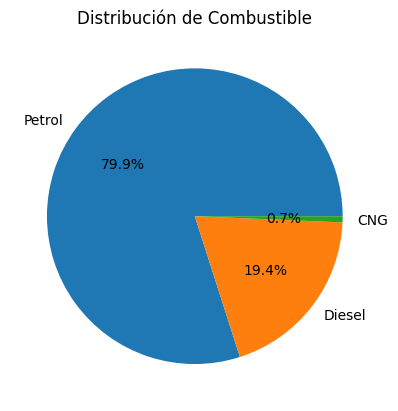

In [ ]:
fuel_type = ['Petrol', 'Diesel', 'CNG']

petrol_count = car_categorical['Fuel_Type'].value_counts()['Petrol']
diesel_count = car_categorical['Fuel_Type'].value_counts()['Diesel']
cng_count = car_categorical['Fuel_Type'].value_counts()['CNG']

counts = [petrol_count, diesel_count, cng_count]

plt.pie(counts, labels=fuel_type, autopct='%1.1f%%')
_ = plt.title('Distribución de Combustible')

In [ ]:
Seller_Type = car_categorical['Seller_Type'].value_counts().reset_index()
# Seller_Type.columns = ['Seller_Type', 'Count']
Seller_Type

,Seller_Type,count
0,Dealer,193
1,Individual,106


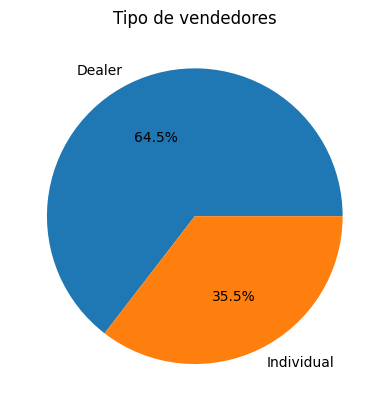

In [ ]:
seller_type = ['Dealer', 'Individual']

dealer_count = car_categorical['Seller_Type'].value_counts()['Dealer']
individual_count = car_categorical['Seller_Type'].value_counts()['Individual']

counts = [dealer_count, individual_count]

plt.pie(counts, labels=seller_type, autopct='%1.1f%%')
_ = plt.title('Tipo de vendedores')

In [ ]:
Transmission = car_categorical['Transmission'].value_counts().reset_index()
# Transmission.columns = ['Transmission', 'Count']
Transmission

,Transmission,count
0,Manual,260
1,Automatic,39


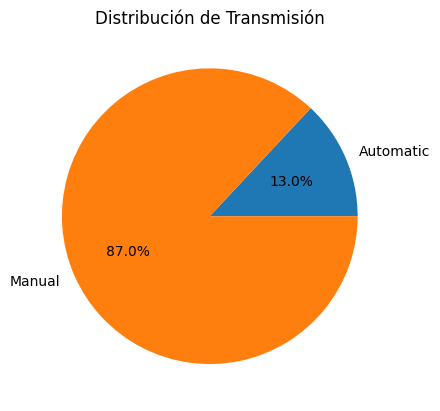

In [ ]:
transmissions = ['Automatic', 'Manual']

automatic_count = car_categorical['Transmission'].value_counts()['Automatic']
manual_count = car_categorical['Transmission'].value_counts()['Manual']

counts = [automatic_count, manual_count]

plt.pie(counts, labels=transmissions, autopct='%1.1f%%')
_ = plt.title('Distribución de Transmisión')

In [ ]:
car_numerical.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Age
0,2014,3.35,5.59,27000,0,10
1,2013,4.75,9.54,43000,0,11
2,2017,7.25,9.85,6900,0,7
3,2011,2.85,4.15,5200,0,13
4,2014,4.60,6.87,42450,0,10


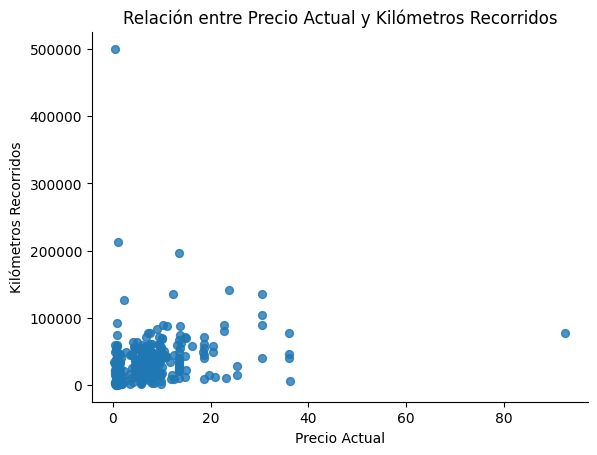

In [ ]:
# @title Present_Price vs Kms_Driven

car_numerical.plot(kind='scatter', x='Present_Price', y='Kms_Driven', s=32, alpha=.8)
plt.xlabel('Precio Actual')
plt.ylabel('Kilómetros Recorridos')
plt.title('Relación entre Precio Actual y Kilómetros Recorridos')
plt.gca().spines[['top', 'right',]].set_visible(False)

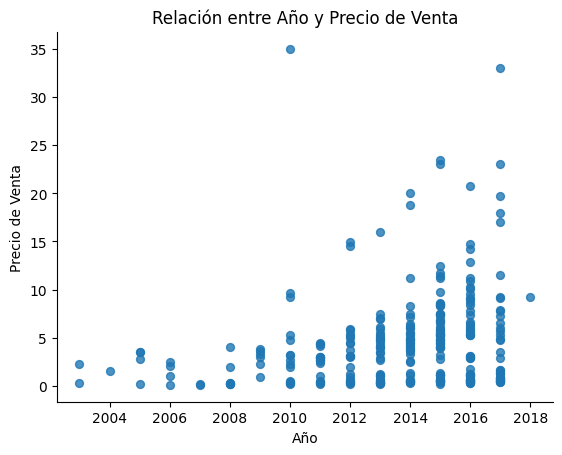

In [ ]:
# @title Year vs Selling_Price

car_numerical.plot(kind='scatter', x='Year', y='Selling_Price', s=32, alpha=.8)
plt.xlabel('Año')
plt.ylabel('Precio de Venta')
plt.title('Relación entre Año y Precio de Venta')
plt.gca().spines[['top', 'right',]].set_visible(False)

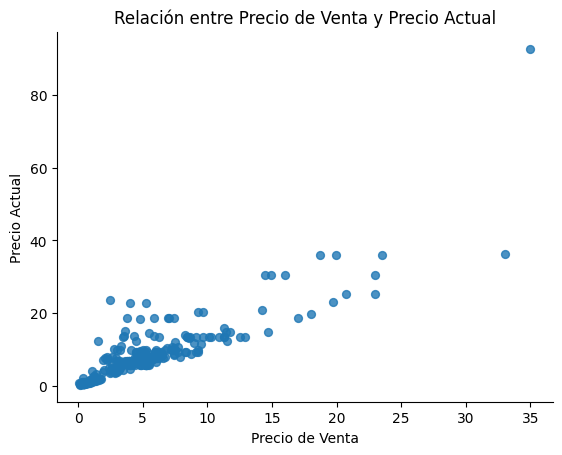

In [ ]:
# @title Present_Price vs Selling_Price

car_numerical.plot(kind='scatter', x='Selling_Price', y='Present_Price', s=32, alpha=.8)
plt.xlabel('Precio de Venta')
plt.ylabel('Precio Actual')
plt.title('Relación entre Precio de Venta y Precio Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

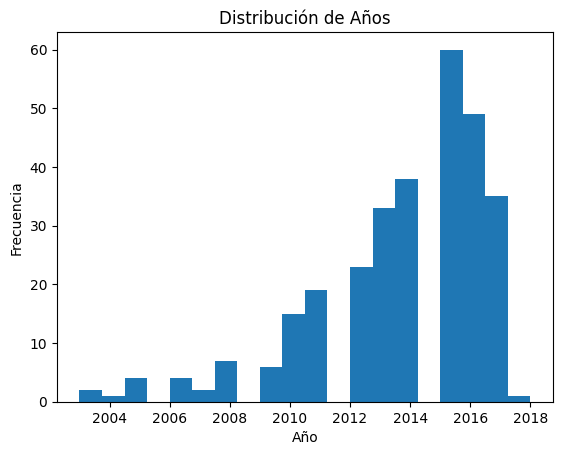

In [ ]:
# @title Distribución de Años

car_numerical['Year'].plot(kind='hist', bins=20, title='Distribución de Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

Convertir las variables categóricas (Fuel_Type, Seller_Type, Transmission) en variables numéricas

Fuel_Type = {
  Petrol: 11,
  Diesel: 12,
  CNG: 12
}

Seller_Type = {
  Dealer: 21,
  Individual: 22
}

Transmission = {
  Manual: 31,
  Automatic: 32

Ya se conocen las variables con valores numericos.

In [ ]:
car_data = car_processed.copy()
car_data.head(10)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
5,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,6
6,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,9
7,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,9
8,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,8
9,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,9


In [ ]:
car_data['Fuel_Type'].replace({'Petrol': 11, 'Diesel': 12, 'CNG': 12}, inplace=True)
car_data['Seller_Type'].replace({'Dealer': 21, 'Individual': 22}, inplace=True)
car_data['Transmission'].replace({'Manual': 31, 'Automatic': 32}, inplace=True)

# car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
# car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

car_data.head(10)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,11,21,31,0,10
1,2013,4.75,9.54,43000,12,21,31,0,11
2,2017,7.25,9.85,6900,11,21,31,0,7
3,2011,2.85,4.15,5200,11,21,31,0,13
4,2014,4.60,6.87,42450,12,21,31,0,10
5,2018,9.25,9.83,2071,12,21,31,0,6
6,2015,6.75,8.12,18796,11,21,31,0,9
7,2015,6.50,8.61,33429,12,21,31,0,9
8,2016,8.75,8.89,20273,12,21,31,0,8
9,2015,7.45,8.92,42367,12,21,31,0,9


Revisamos la correlación entre las variables para identificar qué características tienen mayor influencia en la variable objetivo (Selling_Price).

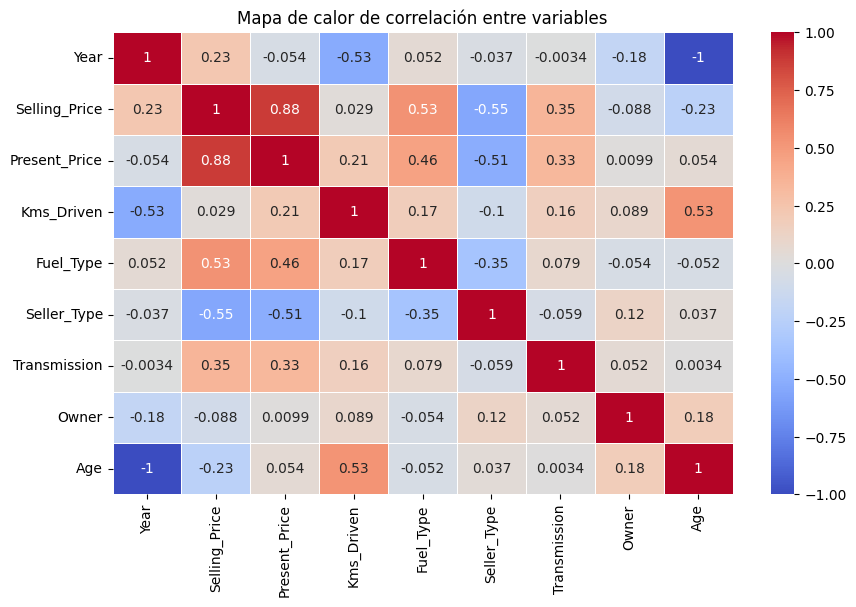

In [ ]:
# @title Mapa de calor para ver las correlaciones

plt.figure(figsize=(10, 6))
correlaciones = car_data.corr()
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de correlación entre variables')
plt.show()

El mapa que has compartido es un **mapa de calor de correlación entre variables**. Este tipo de visualización muestra la relación entre diferentes variables, en este caso relacionadas con automóviles, como Año, Precio de Venta, Precio Actual, Kilómetros Recorridos, Tipo de Combustible, Tipo de Vendedor, Transmisión y Propietario.

### Interpretación del Mapa:
- **Colores**: Los colores varían desde azul oscuro (correlación negativa fuerte) hasta rojo oscuro (correlación positiva fuerte), con el blanco representando ninguna correlación.
- **Valores**: Los valores numéricos en cada celda van de -1 a 1. Un valor de 1 indica una correlación positiva perfecta, -1 una correlación negativa perfecta, y 0 ninguna correlación.

### Ejemplos de Correlaciones:
- **Año y Precio de Venta**: Hay una correlación positiva moderada (0.23), lo que sugiere que los autos más nuevos tienden a venderse a precios más altos.
- **Kilómetros Recorridos y Precio de Venta**: Hay una correlación negativa (-0.53), indicando que los autos con más kilómetros tienden a tener precios de venta más bajos.
- **Tipo de Combustible y Precio de Venta**: Hay una correlación positiva (0.53), lo que podría indicar que ciertos tipos de combustible están asociados con precios de venta más altos.


In [377]:
# Convertir las variables categóricas (Fuel_Type, Seller_Type, Transmission) en variables numéricas
# column_year = 'Car_Age' # 'Year'
# column_selling_price = 'Selling_Price'
# column_present_price = 'Present_Price'
# column_kms_driven = 'Kms_Driven'
# numeric_cols = [column_year, column_selling_price, column_present_price, column_kms_driven]

# Convertir variables categóricas en variables dummy
# car_processed = pd.get_dummies(car_processed, columns=['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'], drop_first=True)

# car_data = pd.get_dummies(car_data, drop_first=True)

# Ver las nuevas columnas del dataframe
# print(car_data.head())

In [ ]:
car_data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,11,21,31,0,10
1,2013,4.75,9.54,43000,12,21,31,0,11
2,2017,7.25,9.85,6900,11,21,31,0,7
3,2011,2.85,4.15,5200,11,21,31,0,13
4,2014,4.60,6.87,42450,12,21,31,0,10
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,12,21,31,0,8
297,2015,4.00,5.90,60000,11,21,31,0,9
298,2009,3.35,11.00,87934,11,21,31,0,15
299,2017,11.50,12.50,9000,12,21,31,0,7


In [ ]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
11    239
12     60
Name: count, dtype: int64
Seller_Type
21    193
22    106
Name: count, dtype: int64
Transmission
31    260
32     39
Name: count, dtype: int64


## Seleccionar las características más relevantes

Revisar las correlaciones individuales con la variable objetivo

 Muestra las relaciones entre las variables, destacando cuáles tienen mayor correlación con la variable objetivo (Selling_Price).

In [ ]:
# Revisar las correlaciones individuales con la variable objetivo
car_data.corr()['Selling_Price'].sort_values(ascending=False)

,Selling_Price
Selling_Price,1.000000
Present_Price,0.876378
Fuel_Type,0.531636
Transmission,0.348869
Year,0.234369
Kms_Driven,0.028566
Owner,-0.087880
Age,-0.234369
Seller_Type,-0.553851


In [ ]:
# Revisar las correlaciones individuales
car_data.corr()['Year'].sort_values(ascending=False)

# car_data.corr()['Age'].sort_values(ascending=False)

,Age
Age,1.000000
Kms_Driven,0.525714
Owner,0.181639
Present_Price,0.053563
Seller_Type,0.036820
Transmission,0.003434
Fuel_Type,-0.052197
Selling_Price,-0.234369
Year,-1.000000


In [344]:
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,11,21,31,0,10
1,2013,4.75,9.54,43000,12,21,31,0,11
2,2017,7.25,9.85,6900,11,21,31,0,7
3,2011,2.85,4.15,5200,11,21,31,0,13
4,2014,4.60,6.87,42450,12,21,31,0,10


In [345]:
Scaler = MinMaxScaler(feature_range=(0,1), copy=True)
Scaled = Scaler.fit_transform (car_data)
car_data1 = pd.DataFrame (Scaled , columns= car_data.columns)

car_data1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0.733333,0.093123,0.057109,0.053053,0.0,0.0,0.0,0.0,0.266667
1,0.666667,0.133238,0.099913,0.085085,1.0,0.0,0.0,0.0,0.333333
2,0.933333,0.204871,0.103273,0.012813,0.0,0.0,0.0,0.0,0.066667
3,0.533333,0.078797,0.041504,0.009409,0.0,0.0,0.0,0.0,0.466667
4,0.733333,0.128940,0.070980,0.083984,1.0,0.0,0.0,0.0,0.266667
...,...,...,...,...,...,...,...,...,...
294,0.866667,0.269341,0.122237,0.067043,1.0,0.0,0.0,0.0,0.133333
295,0.800000,0.111748,0.060468,0.119119,0.0,0.0,0.0,0.0,0.200000
296,0.400000,0.093123,0.115735,0.175043,0.0,0.0,0.0,0.0,0.600000
297,0.933333,0.326648,0.131990,0.017017,1.0,0.0,0.0,0.0,0.066667


In [346]:
df_FirstModel = car_data1.copy() # Scaler
df_FirstModel_1 = car_data.copy() # Originally

# X_FM_1 = df_FirstModel.loc[:, df_FirstModel.columns != 'Selling_Price']
# y_FM_1 = df_FirstModel['Selling_Price'].values.reshape(-1,1)

# Separar las características y la variable objetivo
X_FM_1 = df_FirstModel_1.drop('Selling_Price', axis=1)
y_FM_1 = df_FirstModel_1['Selling_Price']

In [347]:
X_FM_1

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,5.59,27000,11,21,31,0,10
1,2013,9.54,43000,12,21,31,0,11
2,2017,9.85,6900,11,21,31,0,7
3,2011,4.15,5200,11,21,31,0,13
4,2014,6.87,42450,12,21,31,0,10
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,12,21,31,0,8
297,2015,5.90,60000,11,21,31,0,9
298,2009,11.00,87934,11,21,31,0,15
299,2017,12.50,9000,12,21,31,0,7


In [348]:
y_FM_1.T

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


Extraemos la correlación de cada característica con la variable objetivo (Selling_Price)

In [350]:
correlation_matrix = df_FirstModel_1.corr()
correlation_with_target = correlation_matrix['Selling_Price'].sort_values(ascending=False)
print("Correlación de las características con la variable Selling_Price:\n", correlation_with_target)


Correlación de las características con la variable Selling_Price:
 Selling_Price    1.000000
Present_Price    0.876378
Fuel_Type        0.531636
Transmission     0.348869
Year             0.234369
Kms_Driven       0.028566
Owner           -0.087880
Age             -0.234369
Seller_Type     -0.553851
Name: Selling_Price, dtype: float64


## Dividir el dataset en entrenamiento y prueba

División del dataset:
  Divide los datos en un conjunto de entrenamiento y otro de prueba, usando un 80% para entrenar el modelo y un 20% para probarlo.

Definimos X (características) y y (variable objetivo)

Dividimos el dataset en características (X) y la variable objetivo (y). Luego, dividimos en conjuntos de entrenamiento y prueba para evaluar correctamente el modelo.

In [351]:
X_train_FM_1, X_test_FM_1, y_train_FM_1, y_test_FM_1 = train_test_split (X_FM_1, y_FM_1, test_size=0.2, random_state=41)

In [352]:
print ("La X del tren en el Primer Modelo tiene forma: ", X_train_FM_1.shape)
print ("La y del tren en el Primer Modelo tiene forma: ", y_train_FM_1.shape)
print ("La x del test en el Primer Modelo tiene forma: ", X_test_FM_1.shape)
print ("La y del test en el Primer Modelo tiene forma: ", y_test_FM_1.shape)

La X del tren en el Primer Modelo tiene forma:  (239, 8)
La y del tren en el Primer Modelo tiene forma:  (239,)
La x del test en el Primer Modelo tiene forma:  (60, 8)
La y del test en el Primer Modelo tiene forma:  (60,)


In [353]:
df_FirstModel_1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,11.200669,21.354515,31.130435,0.043478,10.384615
std,2.896868,4.984240,8.567887,39015.170352,0.401172,0.479168,0.337346,0.248720,2.896868
min,2003.000000,0.100000,0.320000,500.000000,11.000000,21.000000,31.000000,0.000000,6.000000
25%,2012.000000,0.850000,1.200000,15000.000000,11.000000,21.000000,31.000000,0.000000,8.000000
50%,2014.000000,3.510000,6.100000,32000.000000,11.000000,21.000000,31.000000,0.000000,10.000000
75%,2016.000000,6.000000,9.840000,48883.500000,11.000000,22.000000,31.000000,0.000000,12.000000
max,2018.000000,35.000000,92.600000,500000.000000,12.000000,22.000000,32.000000,3.000000,21.000000


In [354]:
df_FirstModel_1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,11,21,31,0,10
1,2013,4.75,9.54,43000,12,21,31,0,11
2,2017,7.25,9.85,6900,11,21,31,0,7
3,2011,2.85,4.15,5200,11,21,31,0,13
4,2014,4.60,6.87,42450,12,21,31,0,10


Utilizaremos la clase LinearRegression de scikit-learn para entrenar el modelo.

Entrenamos un modelo de regresión lineal con los datos de entrenamiento.

In [355]:
# Crear el modelo de regresión lineal

model = LinearRegression()

In [356]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_FM_1, y_train_FM_1)

LinearRegression()

Predicciones con los datos de prueba

In [357]:
# Hacer predicciones con los datos de prueba
y_prediccion = model.predict(X_test_FM_1)
print(y_prediccion)

[-1.37248052 14.00265348  8.87863563 -1.89957406  0.10655178  6.04787688
  2.17108159  1.97973789  6.30319572  0.61684036 15.58708702  4.69406544
  8.07620327  4.99831511 -0.05865624  2.75834686  6.59042097  7.7784661
  9.97438008  2.6172409   5.18507639  1.06713218  3.93045888 -3.09652603
  5.75936766  8.01234505  0.35394023 21.15700013  5.38538251  4.1787418
  0.82044233  7.26832134  6.28623595  6.77380973  3.60117162  3.63302712
  0.83746953 -0.48911603  6.68820472  1.15943565  5.86416371 -1.08008178
 -1.23729944  4.6505688   5.1055729   4.36567684  2.21081175  0.28952653
  0.95031708 -7.62970916 -0.26366788 19.495332    4.12348136  2.72567089
  6.50758903  5.2319206   8.88637325  0.19726406  1.7042245   0.72853015]


In [358]:
# @title Eliminamos valores menores a cero
y_prediccion[y_prediccion < 0] = 0
y_prediccion

array([ 0.        , 14.00265348,  8.87863563,  0.        ,  0.10655178,
        6.04787688,  2.17108159,  1.97973789,  6.30319572,  0.61684036,
       15.58708702,  4.69406544,  8.07620327,  4.99831511,  0.        ,
        2.75834686,  6.59042097,  7.7784661 ,  9.97438008,  2.6172409 ,
        5.18507639,  1.06713218,  3.93045888,  0.        ,  5.75936766,
        8.01234505,  0.35394023, 21.15700013,  5.38538251,  4.1787418 ,
        0.82044233,  7.26832134,  6.28623595,  6.77380973,  3.60117162,
        3.63302712,  0.83746953,  0.        ,  6.68820472,  1.15943565,
        5.86416371,  0.        ,  0.        ,  4.6505688 ,  5.1055729 ,
        4.36567684,  2.21081175,  0.28952653,  0.95031708,  0.        ,
        0.        , 19.495332  ,  4.12348136,  2.72567089,  6.50758903,
        5.2319206 ,  8.88637325,  0.19726406,  1.7042245 ,  0.72853015])

In [359]:
# Coeficientes de la regresión
beta_0 = model.intercept_  # Intercepto
model_coefficients = model.coef_  # Coeficientes de las características
## Year, Selling_Price, Present_Price, Kms_Driven, Owner, Fuel_Type_Diesel, Fuel_Type_Petrol, Seller_Type_Individual = model.coef_  # Pendientes ()

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print("")

print("Coeficientes de la regresión:")
print("")

num = 0
for feature, coef in zip(X_FM_1.columns, model_coefficients):
  num += 1
  print(f"Coeficiente ({feature}, β{num}: {coef}")

Intercepto (β0): -364.2448231834568

Coeficientes de la regresión:

Coeficiente (Year, β1: 0.17178281842322657
Coeficiente (Present_Price, β2: 0.4265926259185335
Coeficiente (Kms_Driven, β3: -1.4736891634503646e-05
Coeficiente (Fuel_Type, β4: 1.789697120944096
Coeficiente (Seller_Type, β5: -1.39127429882043
Coeficiente (Transmission, β6: 1.0153663630447363
Coeficiente (Owner, β7: -0.6320861472036604
Coeficiente (Age, β8: -0.17178281842322718


## Evaluar el desempeño del modelo

Evaluaremos el modelo utilizando métricas como el R² (coeficiente de determinación), el Error Cuadrático Medio (MSE), y el Error Absoluto Medio (MAE).

Estas métricas te ayudarán a entender qué tan bien está prediciendo el modelo.

In [360]:
# Paso 6: Evaluar el modelo
# Calcular el R², MSE y MAE

r2 = r2_score(y_test_FM_1, y_prediccion)
mse = mean_squared_error(y_test_FM_1, y_prediccion)
mae = mean_absolute_error(y_test_FM_1, y_prediccion)
rmse = np.sqrt(mean_squared_error(y_test_FM_1, y_prediccion))
vcross = cross_val_score(model, X_FM_1, y_FM_1, cv=KFold(5))

print(f"Coeficiente de determinación R²: {r2}")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}\n")

print(f'El error cuadrático medio (RMSE) para el modelo en el primer paso es:: {rmse}')
print(f'La validación cruzada del modelo en el primer paso es: {vcross}')
print(f'La media de la validación cruzada del modelo en el primer paso es: {vcross.mean()}')

Coeficiente de determinación R²: 0.8990626851497238
Error Cuadrático Medio (MSE): 3.189331029311116
Error Absoluto Medio (MAE): 0.7717266162303972

El error cuadrático medio (RMSE) para el modelo en el primer paso es:: 1.7858698242904256
La validación cruzada del modelo en el primer paso es: [   0.86535853    0.77307581 -106.35293441    0.59463077    0.82939913]
La media de la validación cruzada del modelo en el primer paso es: -20.658094034658962


In [362]:
# Opcional: Ver los coeficientes del modelo
coeficientes = pd.DataFrame(model.coef_, X_FM_1.columns, columns=['Coeficiente'])

# coeficientes = pd.DataFrame(model.coef_.reshape(1, -1), columns=X_FM_1.columns, index=['Coeficiente'])
print("\nCoeficientes del modelo: ",)
coeficientes.T


Coeficientes del modelo: 


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
Coeficiente,0.171783,0.426593,-0.000015,1.789697,-1.391274,1.015366,-0.632086,-0.171783


In [363]:
R2_FM_1 = r2_score(y_test_FM_1, y_prediccion)

print(f"Coeficiente de determinación R²: -> R^2 Score:: {R2_FM_1}")

Coeficiente de determinación R²: -> R^2 Score:: 0.8990626851497238


In [380]:
# @title Nueva prueba de predicciones - Second Model

Order=2
TestSize=0.2
RandomState=42

R2 = R2_FM_1

Column_Name_List=[]

X_FM_2 = df_FirstModel.loc[:, df_FirstModel.columns != 'Selling_Price']
y_FM_2 = df_FirstModel['Selling_Price'].values.reshape(-1,1)

for column in X_FM_1:

    Column_Name = column + str(Order)
    Column_Value = X_FM_2[column] ** Order
    Column_index = X_FM_2.columns.get_loc(column) + 1
    X_FM_2.insert(Column_index, Column_Name, Column_Value, True)

    X_train_FM_2, X_test_FM_2, y_train_FM_2, y_test_FM_2 = train_test_split (X_FM_2, y_FM_2, test_size=TestSize, random_state=RandomState)
    First_Model_2 = LinearRegression()
    First_Model_2.fit(X_train_FM_2 , y_train_FM_2)
    y_pred_FM_2 = First_Model_2.predict(X_test_FM_2)
    y_pred_FM_2[y_pred_FM_2 < 0] = 0
    R2_New = r2_score(y_test_FM_2, y_pred_FM_2)

    print('R2 for adding',Column_Name,'is: ', R2_New)

    if R2_New > R2:
        R2 = R2_New
        Column_Name_List.append(Column_Name)
    else:
        X_FM_2 = X_FM_2.drop(columns = Column_Name)

print ('Final R2 is: ', R2,'\n')

R2 for adding Year2 is:  0.7727862041536947
R2 for adding Present_Price2 is:  0.7503851170620601
R2 for adding Kms_Driven2 is:  0.6884577880969908
R2 for adding Fuel_Type2 is:  0.7776809926197167
R2 for adding Seller_Type2 is:  0.7775105679602246
R2 for adding Transmission2 is:  0.7773832175325479
R2 for adding Owner2 is:  0.8087441923234808
R2 for adding Age2 is:  0.7728254244138233
Final R2 is:  0.8990626851497238 



## Visualización de los resultados

Podemos visualizar los resultados comparando los valores predichos con los reales y graficando los residuos para ver cómo el modelo se ajusta.

Gráfico de dispersión (Predicciones vs Valores Reales)

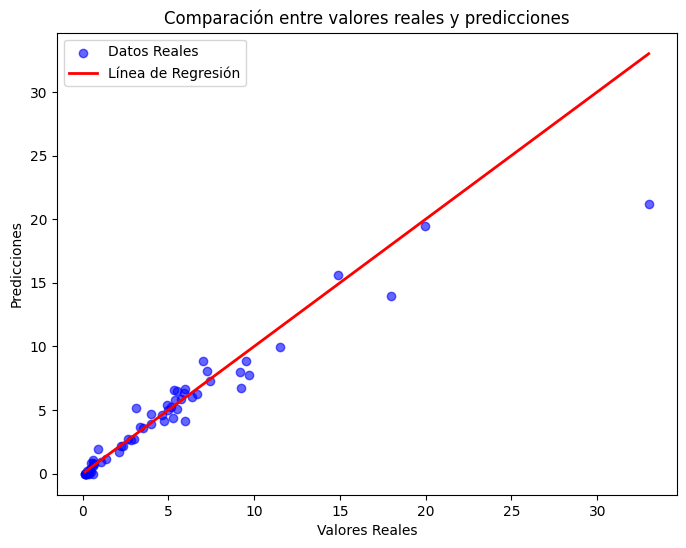

In [365]:
# Gráfico de dispersión (Predicciones vs Valores Reales)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_FM_1, y_prediccion, color='blue', alpha=0.6, label='Datos Reales')
plt.plot([y_test_FM_1.min(), y_test_FM_1.max()], [y_test_FM_1.min(), y_test_FM_1.max()], color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predicciones')
plt.legend()
plt.show()

Gráfico de residuos (errores)

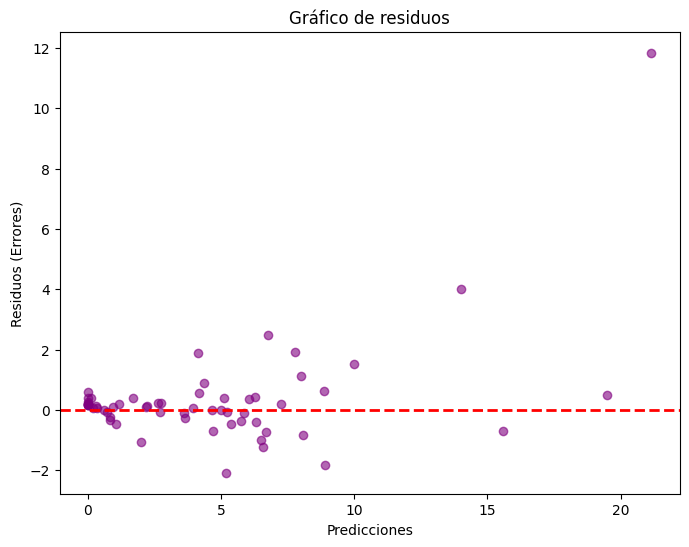

In [366]:
# Gráfico de residuos (errores)
residuos = y_test_FM_1 - y_prediccion
plt.figure(figsize=(8, 6))
plt.scatter(y_prediccion, residuos, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicciones')
plt.ylabel('Residuos (Errores)')
plt.title('Gráfico de residuos')
plt.show()

Distribución de errores

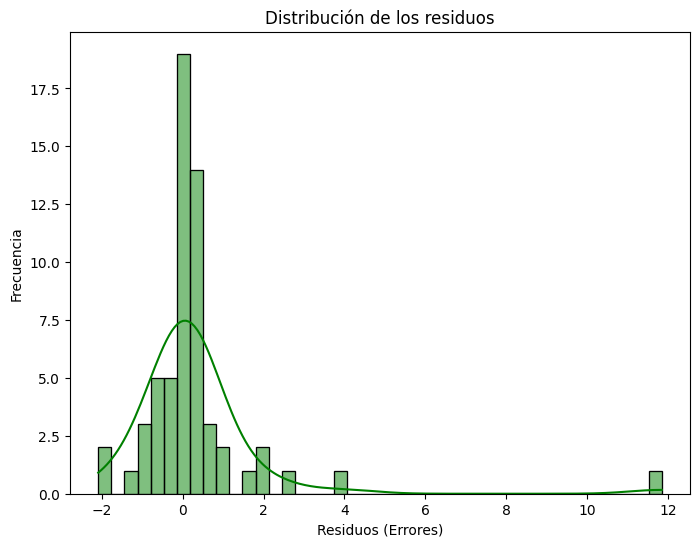

In [368]:
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, color='green')
plt.title('Distribución de los residuos')
plt.xlabel('Residuos (Errores)')
plt.ylabel('Frecuencia')
plt.show()

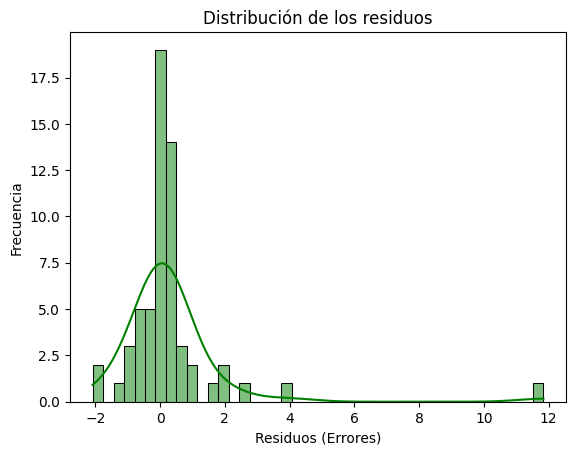

In [369]:
# Distribución de errores
sns.histplot(residuos, kde=True, color='green')
plt.title('Distribución de los residuos')
plt.xlabel('Residuos (Errores)')
plt.ylabel('Frecuencia')
plt.show()

## Predecir el precio de un automóvil:

In [378]:
# Ingresar las características de un automóvil en un diccionario

nuevos_datos = pd.DataFrame({
    'Year': [2015, 2017, 2018, 2010, 2015],
    # 'Selling_Price': [8.00, 6.00, 9.50],
    'Present_Price': [8.00, 6.00, 9.50, 6.00, 7.00],
    'Kms_Driven': [25000, 30000, 10000, 15000, 50000],
    'Fuel_Type': [11, 12, 11, 12, 11],  # Asegúrate de usar las mismas codificaciones numéricas
    'Seller_Type': [21, 22, 21, 22, 21],  # Asegúrate de usar las mismas codificaciones numéricas
    'Transmission': [31, 31, 32, 31, 32],  # Asegúrate de usar las mismas codificaciones numéricas
    'Owner': [0, 1, 0, 1, 0],
    'Age': [8, 6, 5, 7, 10]  # Calcula la edad como la diferencia entre el año actual y el año del auto
})

# Asegúrate de que 'Scaler' sea el objeto MinMaxScaler utilizado anteriormente
# nuevos_datos_scaled = Scaler.transform(nuevos_datos)

# Ahora puedes usar 'nuevos_datos_scaled' para hacer predicciones
precios_predichos = model.predict(nuevos_datos)

# # Mostrar las predicciones para cada automóvil
for i, precio in enumerate(precios_predichos):
    print(f"El precio de venta predicho para el Auto {i+1} es: {precio:.2f} lakhs (moneda india),")

El precio de venta predicho para el Auto 1 es: 5.51 lakhs (moneda india),
El precio de venta predicho para el Auto 2 es: 5.04 lakhs (moneda india),
El precio de venta predicho para el Auto 3 es: 8.42 lakhs (moneda india),
El precio de venta predicho para el Auto 4 es: 3.89 lakhs (moneda india),
El precio de venta predicho para el Auto 5 es: 5.39 lakhs (moneda india),


# Basado en este análisis exploratorio, podemos extraer las siguientes observaciones:

## Información general del dataset:

El dataset contiene **301** entradas y **9** columnas.

Las columnas incluyen:

1. Car_Name
2. Year
3. Selling_Price
4. Present_Price
5. Kms_Driven
6. Fuel_Type
7. Seller_Type
8. Transmission
9. Owner

## Estadísticas descriptivas:

El rango de años de los vehículos va desde 2003 hasta 2018.

El precio de venta promedio es de aproximadamente 5.04 lakhs (moneda india), con un mínimo de 0.1 y un máximo de 35.0 lakhs.

El kilometraje promedio es de alrededor de 36,947 km.

## Valores nulos:

No se encontraron valores nulos en el dataset, lo cual es positivo para nuestro análisis.

## Distribución de variables numéricas:

La distribución del año de los vehículos muestra una concentración en los años más recientes.
Los precios de venta y los precios actuales tienen una distribución sesgada hacia la derecha, con la mayoría de los vehículos en el rango de precios más bajo.
Los kilómetros recorridos también muestran una distribución sesgada hacia la derecha.

## Relación entre Selling_Price y Present_Price:

Existe una fuerte relación positiva entre el precio actual y el precio de venta.

## Relación entre Año y Precio de Venta:

En general, los vehículos más nuevos tienden a tener precios de venta más altos.

## Precio de venta por tipo de combustible:

Los vehículos diésel tienden a tener precios de venta más altos, seguidos por los de gasolina y luego los de GNC.

## Correlación entre variables numéricas:

Hay una fuerte correlación positiva entre Present_Price y Selling_Price (0.88).
Existe una correlación positiva moderada entre Year y Selling_Price (0.23).
Hay una correlación negativa débil entre Kms_Driven y Selling_Price (-0.10).

## Conteo de autos por tipo de vendedor y transmisión:

La mayoría de los vehículos son vendidos por concesionarios.
Hay más vehículos con transmisión manual que automática.

## Relación entre kilómetros recorridos y precio de venta:

Se observa una tendencia general de que los vehículos con más kilómetros recorridos tienen precios de venta más bajos.
Los vehículos diésel tienden a tener precios más altos en comparación con los de gasolina y GNC para kilometrajes similares.

## Finalmente.

Si el R² es cercano a 1, significa que el modelo se ajusta bien a los datos.

Además, si los residuos están distribuidos de manera aleatoria alrededor de 0, significa que el modelo tiene un buen ajuste.

R²: Explica qué porcentaje de la variación en la variable objetivo puede ser explicada por el modelo.

MSE/MAE: Indican la magnitud del error en las predicciones.

Gráficos: Nos ayudan a visualizar el comportamiento del modelo y los errores.